<center>
<img src="../../img/ods_stickers.jpg" />
    
## [mlcourse.ai](https://mlcourse.ai) – Open Machine Learning Course 

<center >Author: Nikita Simonov (@simanjan)

### <center>Self orginizing map.</center>

Self-organizing map is type of [neural network](https://en.wikipedia.org/wiki/Artificial_neural_network) is trained using [unsupervised learning](https://en.wikipedia.org/wiki/Unsupervised_learning) and also is an one of Kohonen neural network. The idea of creatins the such networks belongs to the Finnish scientist [Teuvo Kohonen](https://en.wikipedia.org/wiki/Teuvo_Kohonen). Basically that networks perform clustering and data visualization tasks. But they also allow to reduce multidimensional data into a space of a smaller dimension, and are used to search for patterns in the data.

In this article we will see how to solve the clustering problem with help of the Kohonen network and will build self organizing map.




### <center>Kohonen neural network.</center>

The main element of the network is the Kohonen layer consists of a number of linear elements has m inputs. Every layer get on input the $x = (x_1, x_2, ... , x_n)$ vector from input data. The output of every layer is
$$y_j = \sum_i^n w_{ij}x_i $$

- $i$ - number of input.
- $j$ - number of layer (number of neuron).
- $w_{ij}$ - weight of i-input j-layer.  


After the $y$ of each neuron is calculated, the winner’s neuron will be determined according to the “winner takes all” rule. The max $$y_{max} = argmax\{y_j\}$$  is searched among all and then the output of such a neuron will be $1$, all other outputs will be $0$. 
If the max is  reached in several neurons:  
- all signals will be equal to $1$.
- the first in the max list will be $1$.

### <center>Kohonen map.</center>

 - **Inizialization**
 
     The most popular ways to set the initial node weights are:

     - Set the random values to all weights.
     - To take random $x_i$ from the input data and set it into weights.
     - The choice of weight vectors from  from main components [(PCA)](https://en.wikipedia.org/wiki/Principal_component_analysis) of the input data set.
  
  As a result, we get $M_k$ is the map of neurons. $k$- neurons, their count is sets by the an analytics.
  
      $N$ - number of input data.
    
 - **Trainning**
 
    Initializing $t=0$ is it number of iteration and shuffling input data.
    
     - Choosing $x(t)$ from input data. 
     - Calculate distance  $$d_i(x(t), m_i(t)) = \sqrt{(x_1(t) - m_{1i}(t))^2 + (x_2(t) - m_{2i}(t))^2 + ... + (x_n(t) - m_{ni}(t))^2}$$ from the input vector to all neurons of the map. Here:
          - $d_i(x(t), m_i(t))$ is [Euclidean distance](https://en.wikipedia.org/wiki/Euclidean_distance).
          - $x(t)$ is input vector.
          - $m_i \in M_k$ 
     
     Аmong all the neurons, it is determined closest to the incoming vector $d_{min} = argmin\{d_i\}$.The neuron associated to the $d_{min}$ will be the winner. If $d_{min}$ is reached at several neurons the winner will chosen randomly. $m_w$ is  winner neuron.
     
    Kohonen maps, unlike networks, use the "Winner Takes Most" algorithm in training. In this way the weights of not only the neuron of the winner, but also of [topologically](https://en.wikipedia.org/wiki/Topology) close neurons are updated.
   
     - Calculate $h$ function that defines the "measure of neighborhood" for neurons. Typically $h$ is the [Gaussian function](https://en.wikipedia.org/wiki/Gaussian_function). $$h_{wi} = \alpha(t)  \exp(-\frac{||m_w - m_i||^2}{2 \gamma(t) ^ 2})  $$ 
          - $m_w$ is winner neuron.
          - $m_i \in M_k$ is neuron from map.
          - $\gamma(t)$ is the value function the number of neighbors. The most commonly used function is linearly decreasing from the training itaration number. The value on the first iteration sets by the analyst. Also in simple version $\gamma(t) = \alpha(t)$.
          - $\alpha(t)$ is learning rate function. In simple version is constant. But for the best result, the function is often used $$\alpha(t) = \frac{A}{t + B}$$ here 
              - $t$ is number of iteration.
              - $A and B$ is constant.
          
  - Change weights.
      
      Calculate $m_i(t) = m_i(t-1) + h_i(t) (x(t) - m_i(t-1)),     i = 1,2,..., k$.
      
      
  Update the weights of all neurons that are neighbors of the winner's neuron.
  Increase $t$ and repeat learning.

  Training continues until $t < N$  or until the error becomes small.

<img src="https://upload.wikimedia.org/wikipedia/commons/9/91/Somtraining.svg" alt="Self orginizing map">

Self-organizing maps uses in [data mining](https://en.wikipedia.org/wiki/Data_mining) like a text analysis, financial statement analysis or image analysis.

The advantages of self-organizing cards:
    - Dimensionality reduction.
    - Topological modeling of the training set.
    - Resistance to outliers and missed data.
    - Simple visualization

Visualization of the work of the self-organizing card.
<img src="https://annalyzin.files.wordpress.com/2017/11/som-iterateanimate.gif?w=620" alt="Self orginizing map">

Lets see small example.

First we should install the 'SOMPY' library. The "SOMPY" does not have an official documentation. 

In [1]:
!pip3 install git+https://github.com/compmonks/SOMPY.git

  Cloning https://github.com/compmonks/SOMPY.git to /tmp/pip-req-build-e6f2f3m_
    100% |################################| 163kB 729kB/s ta 0:00:01
  Running setup.py bdist_wheel for SOMPY ... done
  Stored in directory: /tmp/pip-ephem-wheel-cache-8zh2ikor/wheels/cc/5f/3e/4c08f1ca381629d98f50c9ba04bd95c9e704dc37ebdf301c1c
Successfully built SOMPY


Also you may need to install ipdb.

In [2]:
!pip3 install ipdb

  Running setup.py bdist_wheel for ipdb ... done
  Stored in directory: /root/.cache/pip/wheels/a8/0e/e2/ffc7bedd430bfd12e9dba3c4dd88906bc42962face85bc4df7
Successfully built ipdb


Import all necessary libraries.

In [3]:
import matplotlib.pylab as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from time import time
import sompy
np.random.seed(17)

Loaded backend module://ipykernel.pylab.backend_inline version unknown.


Creating a "toy" dataset.

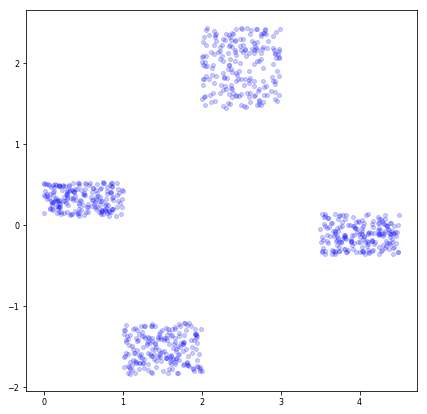

In [38]:
data_len = 200

data_frame_1 = pd.DataFrame(data=np.random.rand(data_len, 4))
data_frame_1.values[:, 1] = (data_frame_1.values[:, 1] + .42 * np.random.rand(data_len, 1))[:, 0]

data_frame_2 = pd.DataFrame(data=np.random.rand(data_len, 4) + 1)
data_frame_2.values[:, 1] = (-1 * data_frame_2.values[:, 1] + .62 * np.random.rand(data_len, 1))[:, 0]

data_frame_3 = pd.DataFrame(data=np.random.rand(data_len, 4) + 2)
data_frame_3.values[:, 1] = (.5 * data_frame_3.values[:, 1] + 1 * np.random.rand(data_len, 1))[:, 0]

data_frame_4 = pd.DataFrame(data=np.random.rand(data_len, 4) + 3.5)
data_frame_4.values[:, 1] = (-.1 * data_frame_4.values[:, 1] + .5 * np.random.rand(data_len,1))[:, 0]

data_full = np.concatenate((data_frame_1, data_frame_2, data_frame_3, data_frame_4))

fig = plt.figure()
plt.plot(data_full[:, 0], data_full[:, 1],'ob', alpha=0.2, markersize=4)
fig.set_size_inches(7, 7)

In [39]:
data_full

array([[ 0.70080903,  0.16735077,  0.23902264,  0.15855355],
       [ 0.99098624,  0.32836844,  0.52532888,  0.86416106],
       [ 0.50765871,  0.39624144,  0.55753557,  0.6274681 ],
       ...,
       [ 4.27444825, -0.31539828,  4.15011112,  3.63629497],
       [ 3.60632082,  0.0898611 ,  4.22930109,  4.07777338],
       [ 4.03323389, -0.07237765,  3.93762173,  3.79096296]])

First we need to set the size of the map, the set of toy data is small, so first we will set the small size of the map.

In [13]:
mapsize = [2,2]

The <code>build</code> method from SOMFactory creates self organizing map,  give it the size of the map and the data. the method takes the size of the map and the data.

<code>initialization='random'</code> is a type of initial node weights, the random values to all weights.

In [14]:
som = sompy.SOMFactory.build(
    data_full, 
    mapsize,
    initialization='random')
som.train(n_job=1, verbose='info')

 Training...
 random_initialization took: 0.000000 seconds
 Rough training...
 radius_ini: 1.000000 , radius_final: 1.000000, trainlen: 1

 epoch: 1 ---> elapsed time:  0.106000, quantization error: 1.658845

 Finetune training...
 radius_ini: 1.000000 , radius_final: 1.000000, trainlen: 1

 epoch: 1 ---> elapsed time:  0.106000, quantization error: 1.515790

 Final quantization error: 1.515790
 train took: 0.223000 seconds


For visualizaion used mapview.View2DPacked.

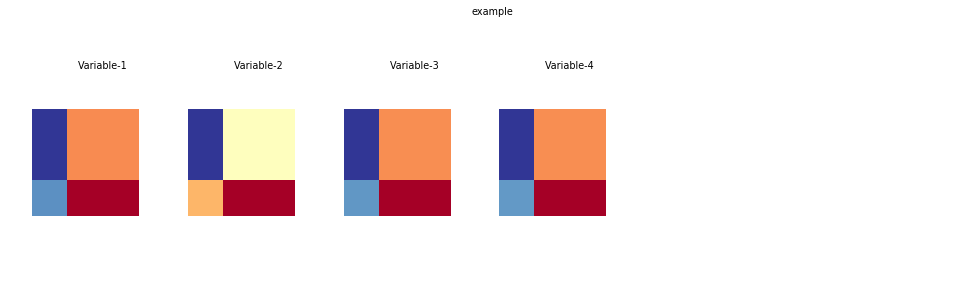

In [47]:
v = sompy.mapview.View2DPacked(10, 10, 'example', text_size=8)  
v.show(som)

The som could recognize four clusters. Although the scope of the cluster are far from ideal.

The "cluster" method is using [sklearn.Kmeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) for predict clusters on the raw data.

In [48]:
v = sompy.mapview.View2DPacked(5, 5, 'test',text_size=8)  
som.cluster(n_clusters=4)
som.cluster_labels

array([2, 0, 1, 3], dtype=int32)

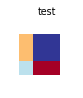

In [49]:
v.show(som, what='cluster');

Let's look at the visualization of clusters on the grid. For this use HitMapView.

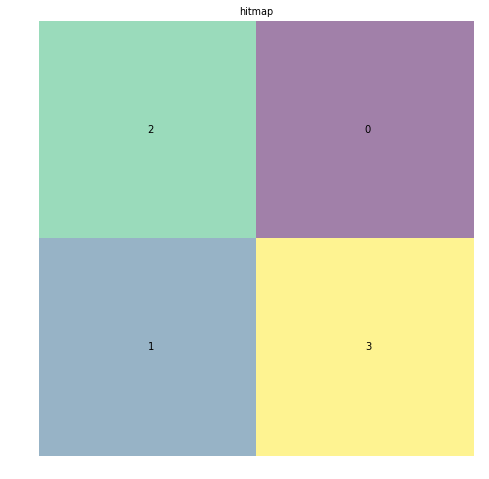

In [50]:
h = sompy.hitmap.HitMapView(8, 8, 'hitmap', text_size=8, show_text=True)
h.show(som);

The grid of self organizing map have a two types:
    - square grid
    - hexagonal grid

<img src="https://annalyzin.files.wordpress.com/2017/10/som-sqhex.png?w=650&h=238" alt="Self orginizing map">

Now we will create a new SOM and add some arguments for best result.

Increasing map size.

In [51]:
mapsize = [20,20]

<code>lattice='rect'</code> is a square grid of SOM.

<code>normalization='var'</code> is the type of [normalization](https://en.wikipedia.org/wiki/Normalization_(statistics)) of the input data. 'var' is [t-statistic](https://en.wikipedia.org/wiki/T-statistic).
$$\frac{X-\bar{X}}{s}$$
- $X$ is input data.
- $\bar{X}$ is average of input data.
- $s$ is [standard deviation](https://en.wikipedia.org/wiki/Standard_deviation).

<code>initialization='pca'</code> is a type of initial node weights, principal component initialization.

<code>neighborhood='gaussian'</code> use the 'gaussian' function for "measure of neighborhood".

In [64]:
som = sompy.SOMFactory.build(
    data_full, 
    mapsize, 
    lattice='rect', 
    normalization='var', 
    initialization='random', 
    neighborhood='gaussian')
som.train(n_job=1, verbose='info')

 Training...
 random_initialization took: 0.001000 seconds
 Rough training...
 radius_ini: 7.000000 , radius_final: 1.166667, trainlen: 15

 epoch: 1 ---> elapsed time:  0.127000, quantization error: 0.553699

 epoch: 2 ---> elapsed time:  0.126000, quantization error: 1.159679

 epoch: 3 ---> elapsed time:  0.113000, quantization error: 0.416257

 epoch: 4 ---> elapsed time:  0.113000, quantization error: 0.370592

 epoch: 5 ---> elapsed time:  0.123000, quantization error: 0.345972

 epoch: 6 ---> elapsed time:  0.111000, quantization error: 0.337165

 epoch: 7 ---> elapsed time:  0.128000, quantization error: 0.329347

 epoch: 8 ---> elapsed time:  0.123000, quantization error: 0.322139

 epoch: 9 ---> elapsed time:  0.117000, quantization error: 0.315155

 epoch: 10 ---> elapsed time:  0.118000, quantization error: 0.307990

 epoch: 11 ---> elapsed time:  0.143000, quantization error: 0.299146

 epoch: 12 ---> elapsed time:  0.119000, quantization error: 0.287074

 epoch: 13 ---> e

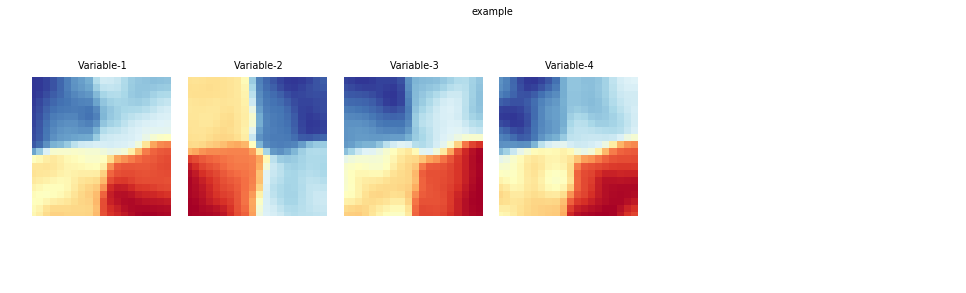

In [65]:
v = sompy.mapview.View2DPacked(10, 10, 'example', text_size=8)  
v.show(som)

In [62]:
v = sompy.mapview.View2DPacked(5, 5, 'test',text_size=8)  
som.cluster(n_clusters=4)
som.cluster_labels

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

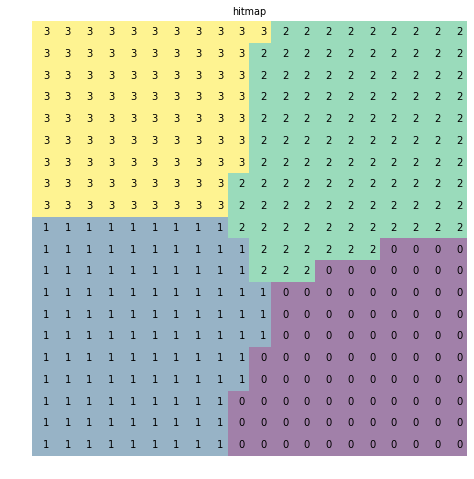

In [63]:
h = sompy.hitmap.HitMapView(8, 8, 'hitmap', text_size=8, show_text=True)
h.show(som);

Now let's use the SOM for [the Iris Dataset](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html)

In [5]:
from sklearn import datasets

In [6]:
iris = datasets.load_iris()

In [7]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [11]:
mapsize = [20,20]

In [13]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [41]:
%%time
som = sompy.SOMFactory.build(
    iris.data, 
    mapsize, 
    lattice='rect', 
    normalization='var', 
    initialization='random', 
    neighborhood='gaussian')
som.train(n_job=1, verbose=False)

CPU times: user 17.4 s, sys: 53.7 s, total: 1min 11s
Wall time: 24.2 s


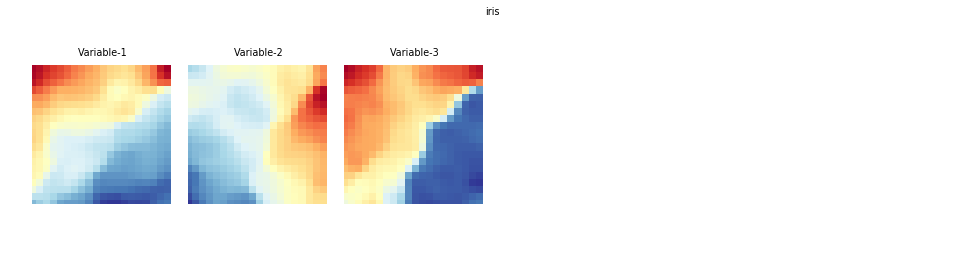

In [31]:
v = sompy.mapview.View2DPacked(10, 10, 'iris', text_size=8)  
v.show(som, which_dim=[0,1,2])

The raw data.

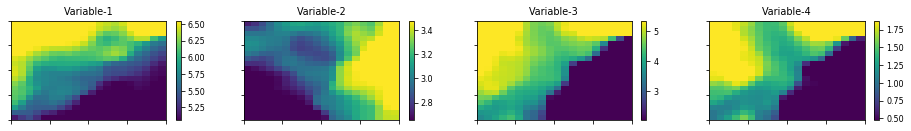

In [33]:
view2D  = sompy.mapview.View2D(10,10,"Iris_raw_data",text_size=8)
view2D.show(som, col_sz=4, which_dim="all",desnormalize=True)

After training, SOM separates four distinct clusters, which is true.

In [34]:
iris.data.shape

(150, 4)

Visualization of a grid.

In [35]:
v = sompy.mapview.View2DPacked(5, 5, 'test',text_size=8)  
som.cluster(n_clusters=3)
som.cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 2, 2, 0, 0, 2, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       2, 2, 2, 0, 0, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2,
       2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,

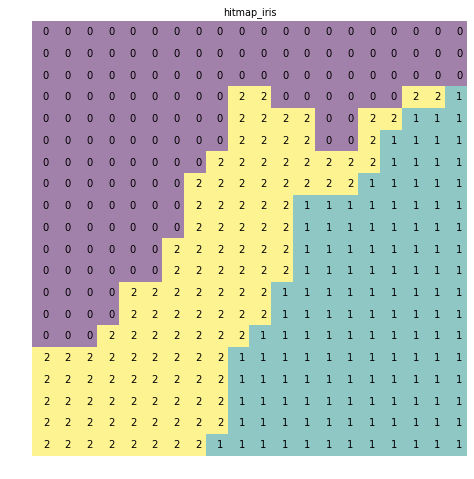

In [36]:
h = sompy.hitmap.HitMapView(8, 8, 'hitmap_iris', text_size=8, show_text=True)
h.show(som, );

Also we can build the [U-matrix](https://en.wikipedia.org/wiki/U-matrix). Use umatrix.UMatrixView for visualization.

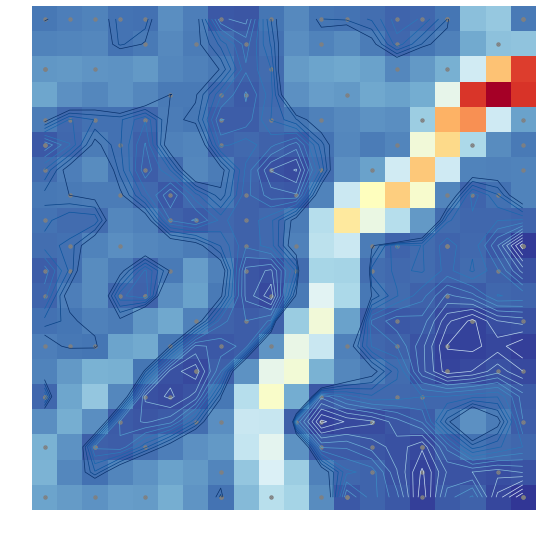

In [37]:
u = sompy.umatrix.UMatrixView(20, 20, 'umatrix')
UMAT  = u.build_u_matrix(som)
UMAT = u.show(som)

### <center>Conclusion</center>

Unfortunately, it’s impossible to consider the example of a hexagonal grid, because the library does not have the corresponding implementation. Also <code>normalization='var'</code> is only one implementation of the normalization.

Kohonen self-organizing maps solve many issues and are a powerful tool for data analysis. In this article, we learned the principle of the SOM, as well as considered small examples of clustering and data visualization. But at the moment, the SOM is losing its popularity in favor of other algorithms.